In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
import sklearn.tree

#### Import data

In [2]:
df = pd.read_csv("data/train_data.csv")
df.drop(["name","director_fees", "loan_advances", "restricted_stock_deferred"], axis=1, inplace=True)
df_y = df["poi"]


#### EDA

C:\Users\wei-jyun\AppData\Local\Temp\ipykernel_11960\1575072101.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[8,8])


<Figure size 800x800 with 0 Axes>

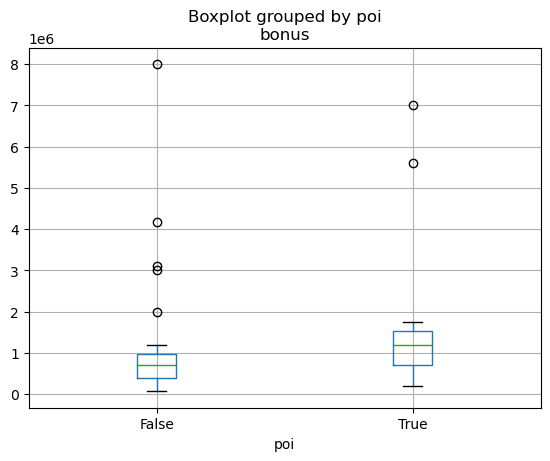

<Figure size 800x800 with 0 Axes>

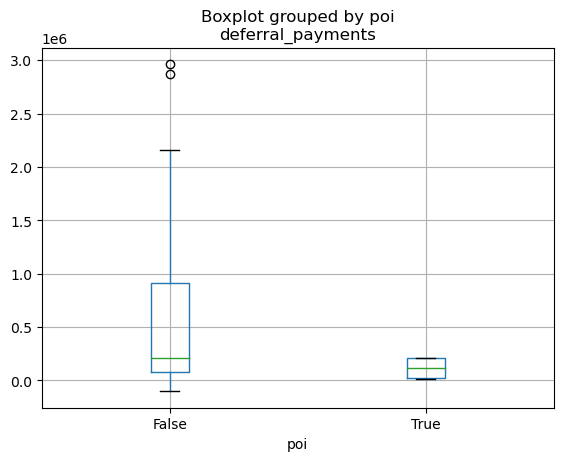

<Figure size 800x800 with 0 Axes>

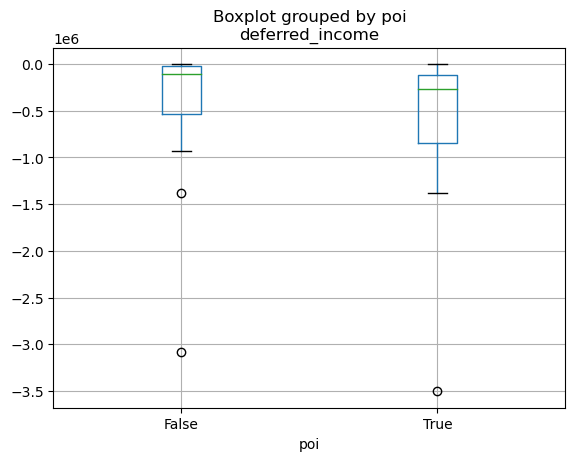

<Figure size 800x800 with 0 Axes>

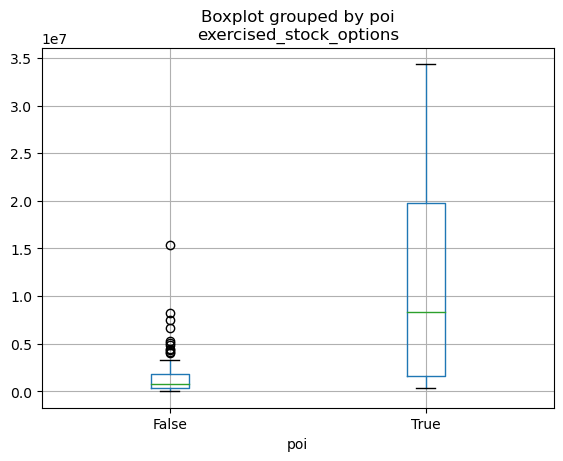

<Figure size 800x800 with 0 Axes>

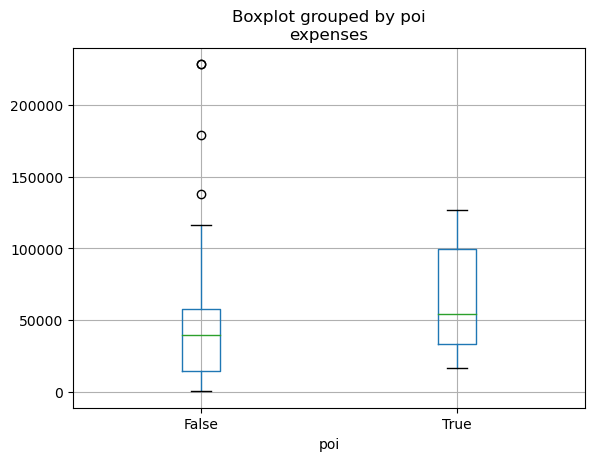

<Figure size 800x800 with 0 Axes>

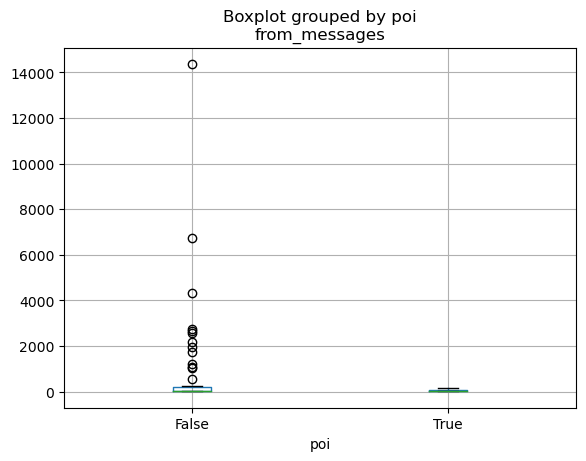

<Figure size 800x800 with 0 Axes>

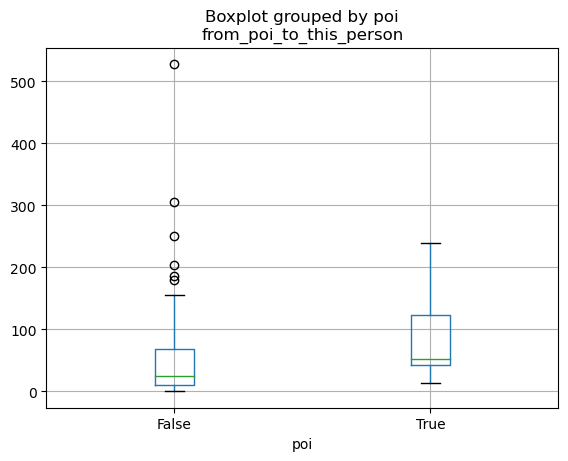

<Figure size 800x800 with 0 Axes>

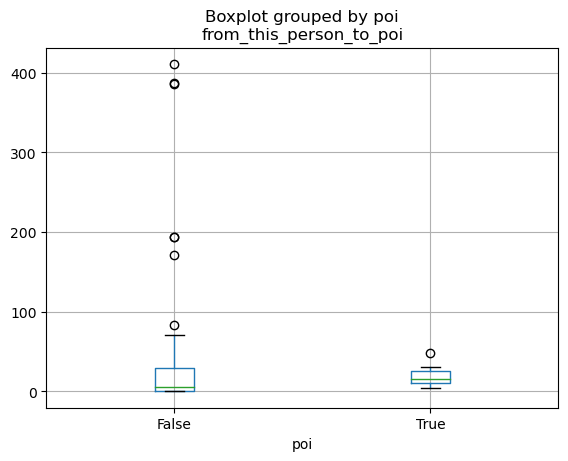

<Figure size 800x800 with 0 Axes>

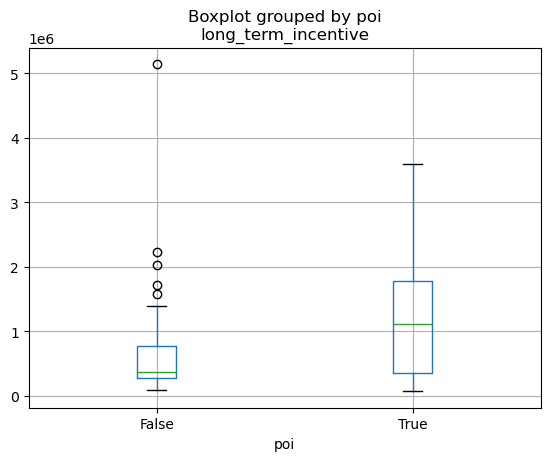

<Figure size 800x800 with 0 Axes>

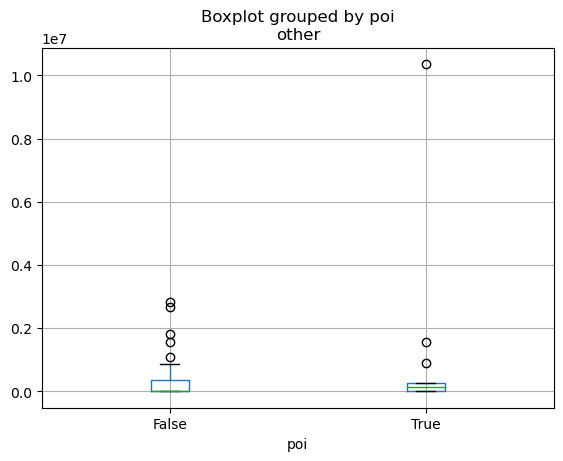

<Figure size 800x800 with 0 Axes>

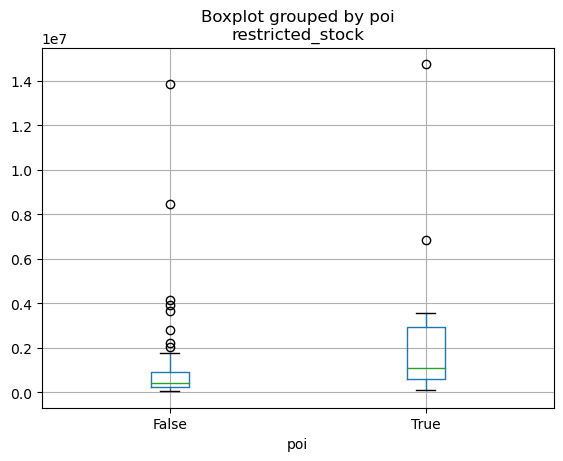

<Figure size 800x800 with 0 Axes>

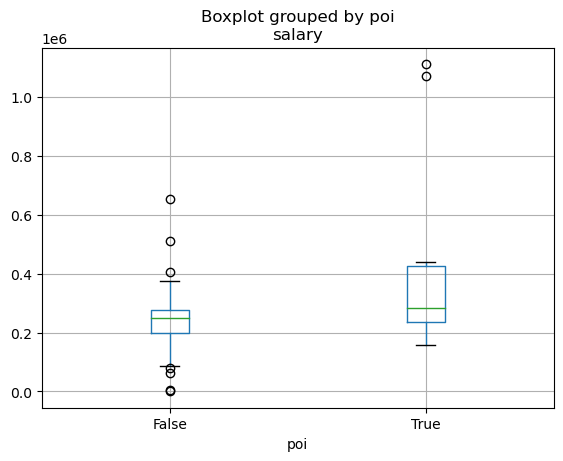

<Figure size 800x800 with 0 Axes>

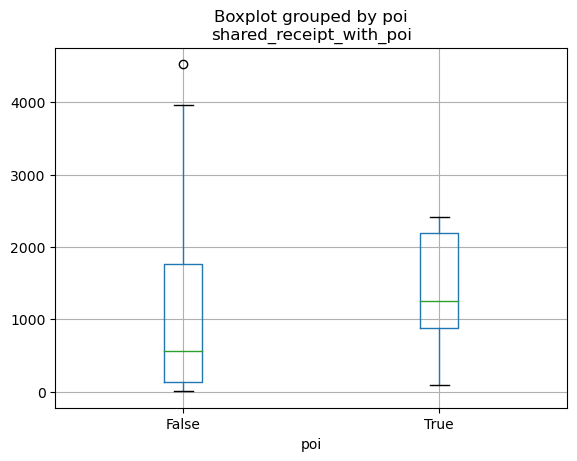

<Figure size 800x800 with 0 Axes>

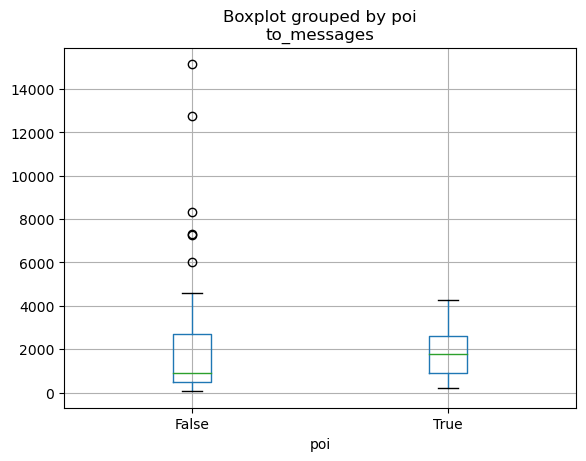

<Figure size 800x800 with 0 Axes>

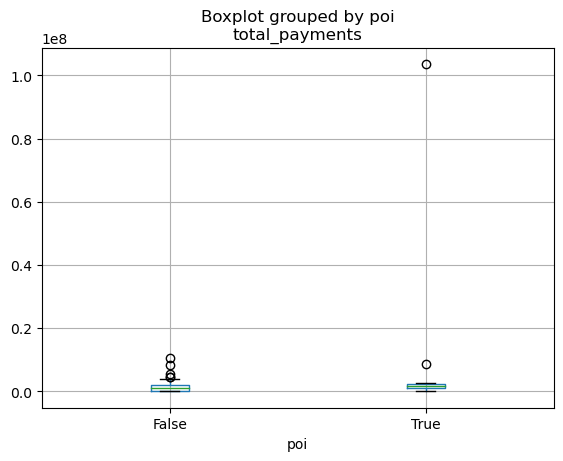

<Figure size 800x800 with 0 Axes>

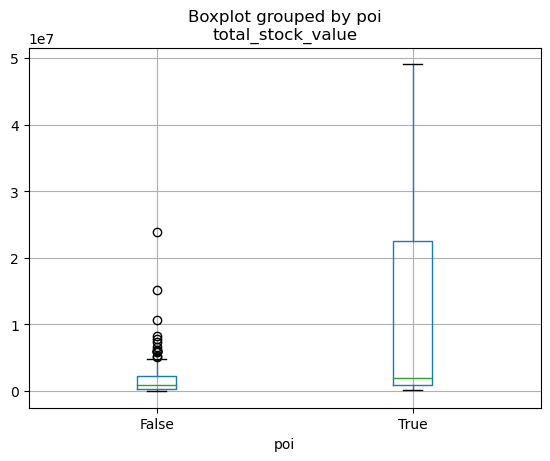

In [3]:
for c in df.columns[~df.columns.isin(["name", "director_fees", "email_address","restricted_stock_deferred","poi"])]:
    if df[c].dtype == "float64":
        plt.figure(figsize=[8,8])
        df.boxplot(column=c,by="poi")     

#### Imputation of Missing value

In [4]:
for c in df.columns:
    if (df[df["poi"] == 0][c].isnull().sum() > 0 and df[c].dtype == "float64") or (df[df["poi"] == 1][c].isnull().sum() > 0 and df[c].dtype == "float64"):
        df.loc[(df["poi"] == 0) & (df[c].isnull()), c] = df.groupby("poi").median()[c][0]
        df.loc[(df["poi"] == 1) & (df[c].isnull()), c] = df.groupby("poi").median()[c][1]
    #elif df[df["poi"] == 1][c].isnull().sum() > 0 and df[c].dtype == "float64" :
        #df.loc[(df["poi"] == 1) & (df[c].isnull()), c] = df.groupby("poi").median()[c][1]


In [5]:
df["email_address"] = [1 if x == True else 0 for x in ~df["email_address"].isnull()]
df.drop("poi", axis=1, inplace=True)


#### Standardized

In [6]:
df_x = pd.DataFrame()
for c in df.columns:
    if df[c].dtype == "float64" and c not in ["bonus", "expenses", "loan_advances"]:#主觀認為這3個feature沒問題 不需轉換
        df_x[c] = pd.DataFrame(StandardScaler().fit_transform(df[c].values.reshape(-1,1)))
    elif c == "email_address":
        df_x[c] = pd.DataFrame(LabelEncoder().fit_transform(df[c].values.reshape(-1,1)))
    else:
        df_x[c] = df[c]  

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### model input by trainset

In [7]:
clf = RandomForestClassifier()
cross_val_score(clf, df_x,df_y,cv=5).mean()

0.9553359683794467

#### import test data

In [8]:
test = pd.read_csv("data/test_features.csv")
test_name = test["name"]
test.drop(["name","director_fees", "loan_advances", "restricted_stock_deferred"], axis=1, inplace=True)

for c in test.columns:
    if (test[c].isnull().sum() > 0 and test[c].dtype == "float64") :
        test.loc[test[c].isnull(), c] = test[c].median()
        
test["email_address"] = [1 if x == True else 0 for x in ~test["email_address"].isnull()]

test_x = pd.DataFrame()

for c in test.columns:
    if test[c].dtype == "float64" and c not in ["bonus", "expenses", "loan_advances"]:#主觀認為這3個feature沒問題 不需轉換
        test_x[c] = pd.DataFrame(StandardScaler().fit_transform(test[c].values.reshape(-1,1)))
    elif c == "email_address":
        test_x[c] = pd.DataFrame(LabelEncoder().fit_transform(test[c].values.reshape(-1,1)))
    else:
        test_x[c] = test[c] 


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
clf.fit(df_x,df_y)
poi = clf.predict_proba(test_x)[:,1]
fraud = pd.DataFrame({"name":test_name, "poi":poi})
fraud.to_csv("submission_2022122504.csv", index=False)


In [10]:
clf2 = GradientBoostingClassifier()
clf2.fit(df_x,df_y)
poi = clf2.predict_proba(test_x)[:,1]
fraud = pd.DataFrame({"name":test_name, "poi":poi})
fraud.to_csv("submission_2022122505.csv", index=False)